# Статистика, DS-поток
## Задание SP.13

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**


Практика:
* Задача P1 &mdash; 70 баллов;
* Задача P2 &mdash; 70 баллов.

**Важность задач:**

* *высокая:* все задачи :)

In [ ]:
# Bot check

# HW_ID: ds_sp13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import CalibratedClassifierCV

from time import time

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
sns.set(style='whitegrid', palette='Set2')

---
### Задача P1.


На семинаре мы рассмотрели различные подходы к калибровке классификационных моделей. Но помимо этого хочется иметь метрики калибровки для сравнения качества полученных моделей.

Сгенерируем выборку, в которой классы не являются линейно-разделимыми, а также добавим к ней фоновый шум из точек разных классов.

Используйте функцию `make_blobs`.

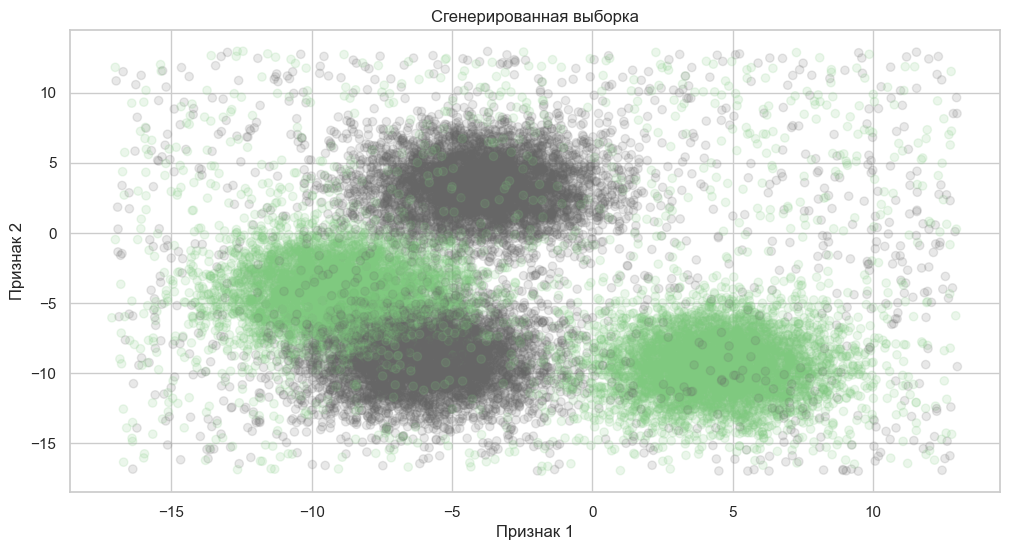

In [2]:
X, y = make_blobs(
    n_samples=20000, n_features=2, centers=4, 
    cluster_std=2.1, random_state=21
)
y = (y>=2).astype(int)

# Шум
n_noise = 2000
X = np.vstack([X, sps.uniform(loc=-17, scale=30).rvs((n_noise, 2))])
y = np.hstack([y, sps.bernoulli(p=0.5).rvs(n_noise)])

# Посмотрим на выборку
plt.figure(figsize=(12, 6))
plt.title('Сгенерированная выборка')
plt.scatter(
    X[:, 0], X[:, 1], 
    c=y, alpha=0.15, cmap='Accent'
)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Разделите выборку на обучение, валидацию и тест.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

Обучите любые три классификационные модели на данных, выведите их метрики.

In [4]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

Отрисуйте калибровочные кривые и гистограммы предсказаний данных моделей. Какие выводы можно сделать?

In [5]:
def calibration_curves(clf_list, figsize=(12, 7)):
    '''
    Отрисовка калибровочной кривой.

    clf_list -- список кортежей (обученный классификатор, его название)
    figsize -- размер фигуры
    '''

    f, ax = plt.subplots(figsize=figsize)

    for i, (clf, name) in enumerate(clf_list):
        probs = clf.predict_proba(X_test)[:, 1]
        CalibrationDisplay.from_predictions(
            y_test, probs, n_bins=20, lw=3, name=name, ax=ax, strategy='quantile'
        )
    ax.set_xlabel('Предсказанная вероятность (среднее внутри бина)')
    ax.set_ylabel('Доля класса 1 в бине')
    ax.set_title('Сравнение калибровочных кривых')
    plt.show();

def draw_probs_hist(clf_list, X_test, ncols=3):
    '''
    Отрисовка гистограмм предсказаний вероятностей.

    clf_list -- список кортежей (обученный классификатор, его название)
    X_test -- тестовая выборка
    ncols -- количество колонок для отрисовки графика
    '''

    with sns.axes_style('whitegrid'):
        nrows = int(np.ceil(len(clf_list) / ncols))
        plt.figure(figsize=(18, 4*nrows))

        for i, (clf, name) in enumerate(clf_list):
            plt.subplot(nrows, ncols, i+1)
            y_prob = clf.predict_proba(X_test)[:, 0]
            plt.hist(y_prob, range=(0, 1), bins=10, label=name)
            plt.title(name)
            plt.xlabel('Предсказ. вероятность')

        plt.tight_layout()
        plt.show()

def draw_prob_predictions(clf, X_test, name, step=0.1):
    '''
    Отрисовка предсказаний вероятностей.

    clf -- обученный классификатор
    X_test -- тестовая выборка
    name -- имя классификатора
    step -- шаг сетки
    '''

    x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
    y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()

    X_grid = np.mgrid[x_min:x_max:step, y_min:y_max:step]
    size_x, size_y = X_grid.shape[1:]
    X_grid_list = X_grid.reshape((2, size_x*size_y)).T

    probs_pred = clf.predict_proba(X_grid_list)[:, 0]

    plt.figure(figsize=(10, 7))
    plt.title(f'Предсказания {name}')
    plt.pcolormesh(
        X_grid[0], X_grid[1], probs_pred.reshape((size_x, size_y)), cmap='Greens',
        vmin=0, vmax=1
    )
    plt.scatter(
        X_test[:, 0], X_test[:, 1],
        c=y_test, alpha=0.5, cmap='cool'
    )
    plt.xlim((x_min, x_max)), plt.ylim((y_min, y_max))
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()

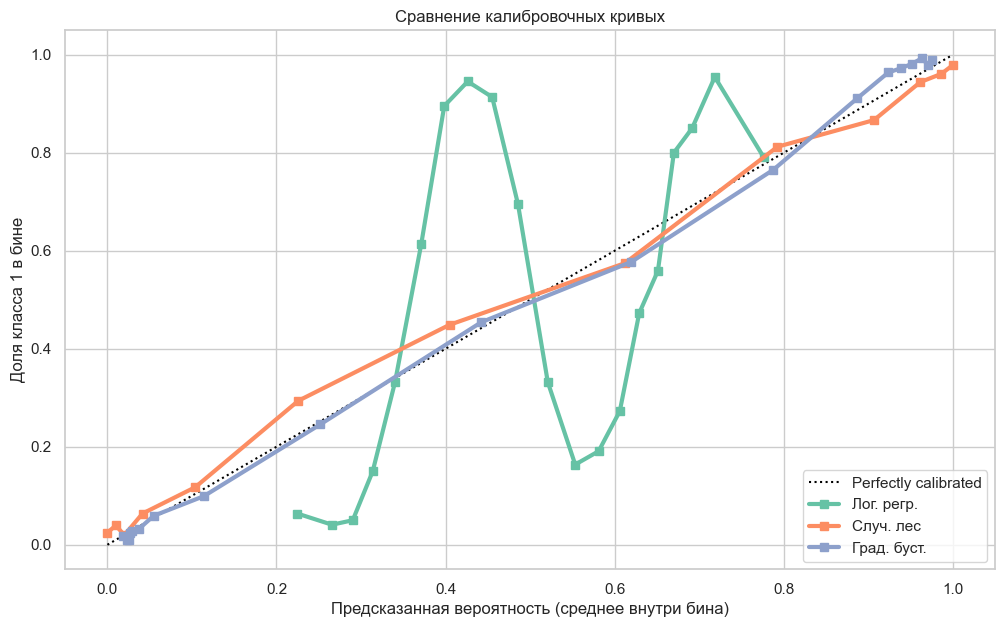

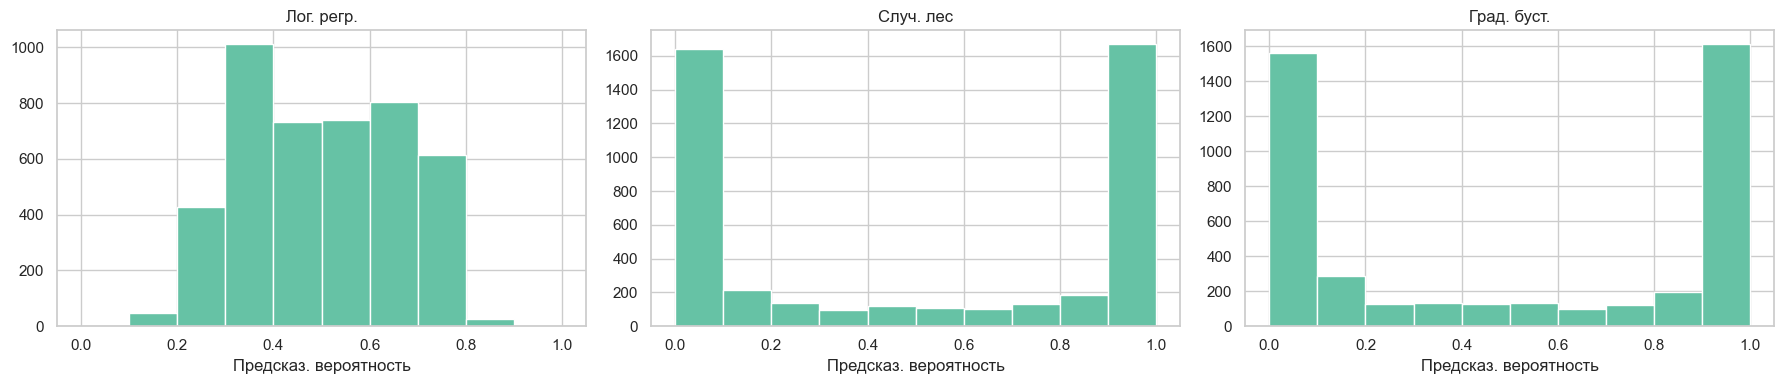

In [6]:
clf_list = [(lr, 'Лог. регр.'), (rf, 'Случ. лес'), (gb, 'Град. буст.')]

calibration_curves(clf_list)
draw_probs_hist(clf_list, X_test)

Логистическая регрессия хуже всего откалибрована. Случ лес и град бустинг значительно лучше

Откалибруйте модели. И посмотрите на кривые для новых моделей. Сделайте выводы.

In [14]:
lr_calib = CalibratedClassifierCV(
    estimator=lr,
    cv="prefit",
    method='isotonic'
).fit(X_calib, y_calib)

rf_calib = CalibratedClassifierCV(
    estimator=rf,
    cv="prefit",
    method='isotonic'
).fit(X_calib, y_calib)

gb_calib = CalibratedClassifierCV(
    estimator=gb,
    cv="prefit",
    method='isotonic'
).fit(X_calib, y_calib)

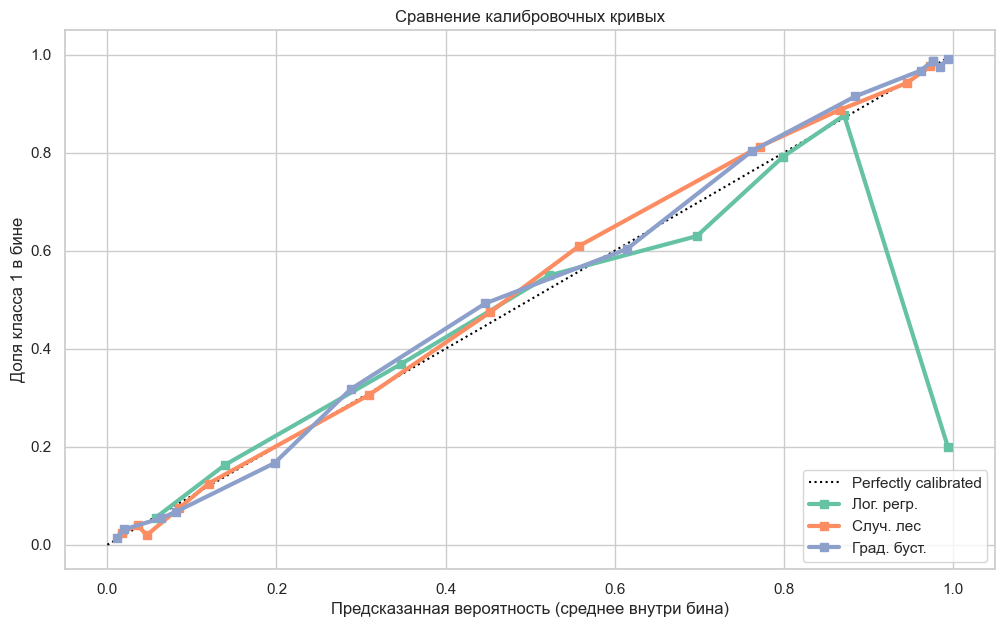

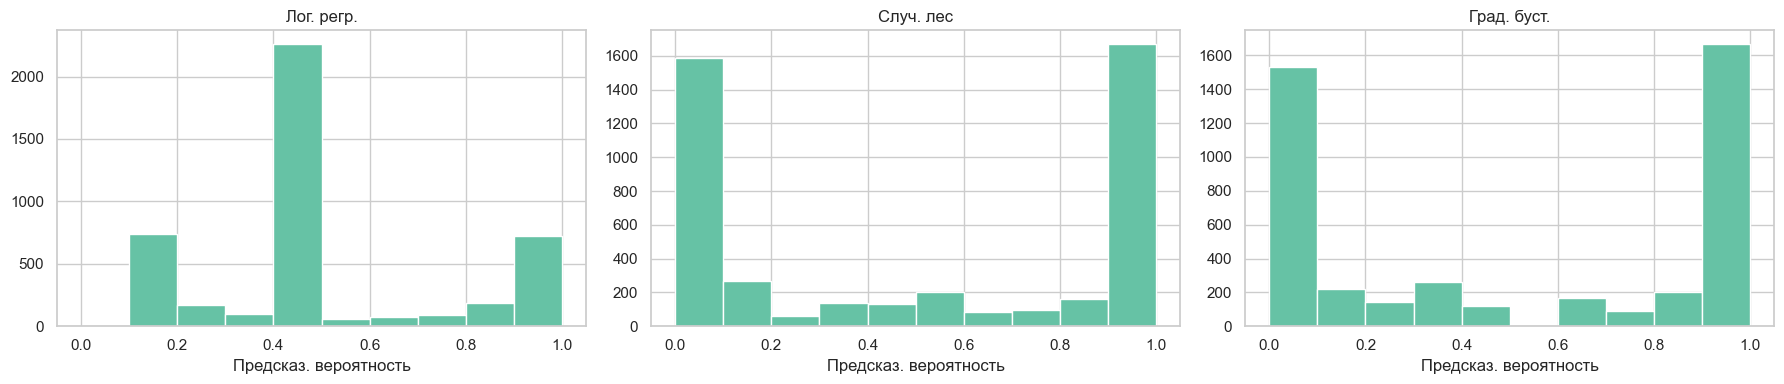

In [9]:
clf_list = [(lr_calib, 'Лог. регр.'), (rf_calib, 'Случ. лес'), (gb_calib, 'Град. буст.')]

calibration_curves(clf_list)
draw_probs_hist(clf_list, X_test)

Cлуч лесу и град бусту стало лучше после калибровки. Лог регрессии в принципе тоже, но при приближении к вероятности 1 произошел скачок.

---

Для оценки калибровки используются, как правило, две метрики:
- Expected Callibration Error
- Brier Score

**Expected Callibration Error**

Данная метрика наследует идеи гистограммной калибровки. Пусть $B_1, \dots, B_k$ &mdash; разбиение отрезка $[0, 1]$ на непересекающиеся бины.

$$ECE = \sum_{j = 1}^k \cfrac{\sum_{i=1}^n I\{x_i \in B_j\}}{n} \left|\overline{y}(B_j) - \overline{p}(B_j)\right|$$

**Brier Score**

Данный подход ближе к изотонической регрессии.
$$BS = \sum_{i=1}^n (y_i - p(x_i))^2.$$
Причем в качестве функции разницы рассматривают не только квадратичную ошибку.

---

Реализуйте функции для подстчета метрик:

In [10]:
def brier_score(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum()

def expected_calibration_error(y_true, y_pred, num_bins=10):
    bins = np.linspace(0, 1, num_bins + 1)
    ece = 0.0
    for i in range(num_bins):
        bin_mask = (y_pred > bins[i]) & (y_pred <= bins[i + 1])
        bin_count = np.sum(bin_mask)
        if bin_count > 0:
            avg_pred = np.mean(y_pred[bin_mask])
            avg_true = np.mean(y_true[bin_mask])
            ece += bin_count * np.abs(avg_pred - avg_true)
    return ece / len(y_true)

Проанализируйте, какой метод калибровки лучше подоходит для каждой из моделей.

In [15]:
BS_isot = []
ECE_isot = []

for model in [lr_calib, rf_calib, gb_calib]:
    preds = model.predict(X_test)
    BS_isot.append(brier_score(preds, y_test))
    ECE_isot.append(expected_calibration_error(y_test, preds))


In [16]:
lr_calib = CalibratedClassifierCV(
    estimator=lr,
    cv="prefit",
    method='sigmoid'
).fit(X_calib, y_calib)

rf_calib = CalibratedClassifierCV(
    estimator=rf,
    cv="prefit",
    method='sigmoid'
).fit(X_calib, y_calib)

gb_calib = CalibratedClassifierCV(
    estimator=gb,
    cv="prefit",
    method='sigmoid'
).fit(X_calib, y_calib)

BS_sigm = []
ECE_sigm = []

for model in [lr_calib, rf_calib, gb_calib]:
    preds = model.predict(X_test)
    BS_sigm.append(brier_score(preds, y_test))
    ECE_sigm.append(expected_calibration_error(y_test, preds))

In [19]:
pd.DataFrame({'BS_isotonic' : pd.Series(BS_isot, index=['LogReg', 'RandomForest', 'GradientBoosting']),
              'ECE_isotonic' : pd.Series(ECE_isot, index=['LogReg', 'RandomForest', 'GradientBoosting']),
              'BS_sigmoid' : pd.Series(BS_sigm, index=['LogReg', 'RandomForest', 'GradientBoosting']),
              'ECE_sigmoid' : pd.Series(ECE_sigm, index=['LogReg', 'RandomForest', 'GradientBoosting'])
              })

,BS_isotonic,ECE_isotonic,BS_sigmoid,ECE_sigmoid
LogReg,1361,0.274318,2043,0.228182
RandomForest,449,0.047045,449,0.048182
GradientBoosting,408,0.052727,415,0.047273


Для лог регрессии лучше isotonic по метрике BS, и сигмоида по метрике ECE.

Для случ леса лучше isotonic по метрике ECE, но незначительно. BS вообще одинаковая.

Для град буста лучше isotonic по метрике BS, и сигмоида по метрике ECE.

ECE фокусируется только на калибровке (разнице между предсказанными и фактическими вероятностями).
BS объединяет аспекты калибровки и точности (чем точнее предсказания модели, тем ниже BS).

**Вывод:**

Калибровка модели в задачах классификации — это способность модели предсказывать вероятности, которые соответствуют реальной частоте событий. Идеально откалиброванная модель предсказывает вероятность, и это значение совпадает с фактической частотой положительных исходов среди примеров с этой вероятностью.

1. Expected Calibration Error:
   - Отражает среднюю разницу между предсказанными вероятностями и фактическими частотами событий.
   - Позволяет понять, насколько "уверенность" модели соответствует реальности.
   - Чем меньше ECE, тем лучше откалибрована модель.
   - ECE особенно полезна в ситуациях, где важно доверие к вероятностям, например, в медицинской диагностике или кредитном скоринге.

2. Brier Score (BS):
   - Измеряет среднеквадратичное отклонение между предсказанной вероятностью и истинным исходом.
   - Объединяет аспекты точности и калибровки: низкий Brier Score свидетельствует о точных и хорошо откалиброванных предсказаниях.
   - Brier Score полезен, когда важны не только вероятности, но и общая точность модели.

---
### Задача P2.


Исследуем, насколько скалиброванны нейронные сети. Рассмотрим датасет <a href="https://www.kaggle.com/datasets/chetankv/dogs-cats-images">Dogs & Cats Images</a>. Требуется определить, кто изображен на картинке &mdash; собака или кошка.

Выделите из обучающего набора выделите трейн и валидацию в соотношении 3:1.

Постройте простую сверточную нейронную сеть для классификации изображений и обучите ее на тренировочной части данных. Используйте хотя бы несколько сверточных слоев, но слишком много не стоит.

Также выберите один из <a href="https://pytorch.org/vision/stable/models.html">видов архитектруры</a> нейронной сети для классификации изображений из torchvision, например, ResNet. Определите для него 3 варианта архитектуры с разным количеством параметров.

Для каждой рассмотренной ранее модели выполните следующие действия.
* Посмотрите на калибровочную кривую и оценку качества калибровки.
* Примените методы калибровки и сравните результаты. Посчитайте, как изменилась точность классификации на тестовой части данных.

Поясните, почему калибровку необходимо выполнять на валидационной части данных, а оценивать точность классификации &mdash; на тестовом.

Сделайте выводы.